In [60]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import sleep
from time import time
import csv

# to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

def api_pull():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'21',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'f3f0734d-8d9c-4a2e-be9e-82e0501f442e',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:  
        print(e) 


    final_df = pd.json_normalize(data['data'])
    final_df['timestamp'] = pd.to_datetime('now', utc=True)
    # 'utc=True' to avoid deprecation error
    return final_df

# checks for file existence and creates if not exist, and closes with 'pass'
if not os.path.isfile(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv'):
    with open(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv', 'w') as opt:
        pass
    
# automates call, creates an empty list, each 'call' result is appended to the result
data_frames = []
#for pulls in range(7):
    #data_frames.append(api_pull())
    #print("API pull completed successfully!")
    #sleep(86400) # delay

# decided to remove the loop and set it up in task scheduler, the trigger in task scheduler manages the loop
data_frames.append(api_pull())
print('Data collected successfully')

# print(data_frames)
 
final_d = pd.concat(data_frames)

# compile all returned API calls and writes with 'mode=w' to csv file if file exists, else if it's a newly created file, 'mode=a' to append data every call
# final_d.to_csv(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv', mode='w', header=True, index=False)
final_d.to_csv(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv', mode='a', header=True, index=False)
# print(final_d)
# reads file

Data collected successfully


In [ ]:
import pandas as pd
import numpy as np
check_frame = pd.read_csv(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv')
print(check_frame)
# '.groupby.(metric of interest, e.g mean)' similar to groupings in SQL
# final_d1 = check_frame.groupby('name', sort=True)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [68]:
import csv
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# using csv reader
with open (r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\optimizedCryptoAPI.csv', newline='') as csv1:
    csv2 = csv.reader(csv1)
    csvheader = next(csv2)
    csv3 = []
    csv4 = []
    for row in csv2:
        if len(row) == 36:
            csv3.append(row)
        elif len(row) == 37:
            csv4.append(row)

shortfile = pd.DataFrame(csv3)
shortfile.columns = csvheader
shortfile.head(2)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10139,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19336781.0,19336781.0,,1,,,,2023-04-04T11:06:00.000Z,28263.815385631806,18081919737.035175,11.1602,-0.02541697,-0.11157002,5.54808811,26.08727091,20.58731159,67.77768415,546531208336.39276,46.2056,593540123098.27,,2023-04-04T11:06:00.000Z,,,,,,2023-04-04 11:07:57.164138+00:00
1,1027,Ethereum,ETH,ethereum,6690,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",,120457776.0,120457776.0,,2,,,,2023-04-04T11:06:00.000Z,1836.4624903110828,9778764306.565737,29.5905,0.11641072,1.77762204,6.80735429,16.91006639,11.69250087,46.98918527,221216187290.2946,18.7089,221216187290.29,,2023-04-04T11:06:00.000Z,,,,,,2023-04-04 11:07:57.164138+00:00


In [69]:
longfile = pd.DataFrame(csv4)
longfile.tail(22)
# Assigning column title to dataFrame using its row 84, with pandas indexing method
new_header = longfile.iloc[84].values
longfile.columns = new_header
longfile.tail(2)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
104,7083,Uniswap,UNI,uniswap,664,2020-09-17T00:00:00.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1000000000.0,577486703.0,1000000000.0,False,,20,,,0.81263367,2023-04-20T13:47:00.000Z,5.902498941957362,86810684.99317732,-42.302,-0.24067684,-0.34201943,-3.64522757,-7.29514732,-17.93112534,-3.7455941,3408614653.451946,0.2807,5902498941.96,4194527944.1849604,2023-04-20T13:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,2023-04-20 13:48:59.961605+00:00
105,3794,Cosmos,ATOM,cosmos,437,2019-03-14T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'content-crea...",,286370297.0,0.0,False,,21,,,,2023-04-20T13:47:00.000Z,11.831336517012744,177661697.01949587,-8.0726,-0.41660645,-0.16443902,0.59551404,-0.19688931,-18.97579172,-3.88098555,3388143352.283885,0.279,0.0,,2023-04-20T13:47:00.000Z,,,,,,2023-04-20 13:48:59.961605+00:00


In [151]:
lf = set(longfile.columns)
sf = set(shortfile.columns)

lf.difference(sf)

{'infinite_supply'}

In [167]:
nlf = longfile.drop('infinite_supply', axis=1)
df = pd.concat([shortfile, nlf], ignore_index=True)
df1 = df.drop(147)
# df1.loc[df['name'] == 'name']
df1.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'platform',
       'cmc_rank', 'self_reported_circulating_supply',
       'self_reported_market_cap', 'tvl_ratio', 'last_updated',
       'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [191]:
# group by name using astype('float)
df2 = df1[['name','quote.USD.price','quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d','timestamp']]
df2[['quote.USD.price','quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']] = df2[['quote.USD.price','quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].astype('float')


C:\Users\zee-sama\AppData\Local\Temp\ipykernel_8044\2148159719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['quote.USD.price','quote.USD.percent_change_1h',


In [192]:
df3 = df2.rename(columns={'quote.USD.price':'Price_USD', 'quote.USD.percent_change_1h':'1h', 'quote.USD.percent_change_24h':'24h',  'quote.USD.percent_change_7d':'7d',
                          'quote.USD.percent_change_30d':'30d', 'quote.USD.percent_change_60d':'60d', 'quote.USD.percent_change_90d':'90d'})
df3.dtypes

name          object
Price_USD    float64
1h           float64
24h          float64
7d           float64
30d          float64
60d          float64
90d          float64
timestamp     object
dtype: object

In [210]:
# df4 = df3.groupby(['name', 'timestamp'], sort=False).mean()
df4 = df3.groupby('name', sort=False).mean()
df5 = df4.drop('Price_USD', axis=1)
df5.head()

# df4.to_csv(r'C:\Users\zee-sama\OneDrive\Desktop\Data\Jupyter\CurrenciesTrend.csv', mode='a', header=True, index=True)

C:\Users\zee-sama\AppData\Local\Temp\ipykernel_8044\2234352731.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df3.groupby('name', sort=False).mean()


,1h,24h,7d,30d,60d,90d
name,,,,,,
Bitcoin,-0.099277,-0.234089,-0.532787,27.348210,20.917501,61.974414
Ethereum,-0.097185,0.300131,3.002812,21.276922,13.182206,43.636878
Tether,-0.006445,0.002819,0.005739,-0.055871,0.012612,0.038776
BNB,-0.039568,-0.013280,-0.585592,8.595050,-4.057283,17.724185
USD Coin,-0.005771,-0.000047,0.006415,1.208045,-0.015808,-0.014342


In [212]:
df6 = df5.stack()
df7 = df6.to_frame()
df8 = df7.reset_index()

In [215]:
df9 = df8.rename(columns={'level_1':'Change In Percent', 0:'values'})

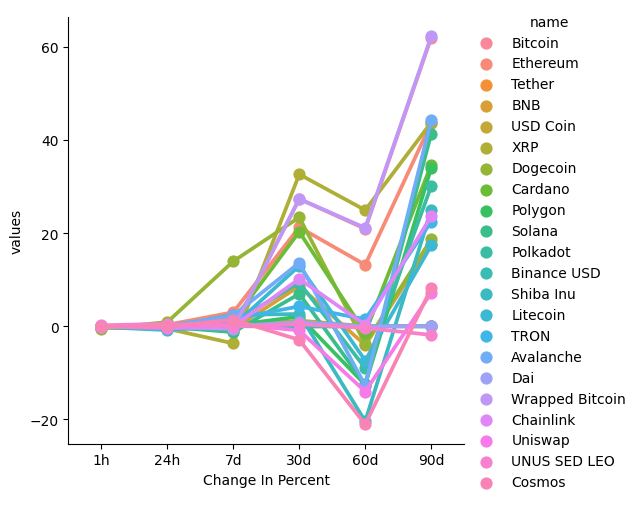

In [217]:
import seaborn as sns
sns.catplot(x='Change In Percent', y='values', hue='name', data=df9, kind='point')

In [ ]:
# flips back dataframe (column title gets converted into rows)
final_d3 = final_d2.to_frame()
final_d3.count()